In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Ignore only the specific FutureWarning from pandas option
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning,
    message=r".*use_inf_as_na option is deprecated.*"
)
        
pd.option_context('mode.use_inf_as_na', True)
# Setting Matplotlib defaults
plt.style.use('seaborn-v0_8-pastel')
plt.rc('figure', autolayout=True, dpi=200, figsize=(12, 6))
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=16, titlepad=10)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stocks-data-2025/NVDA.csv


In [2]:
df = pd.read_csv('/kaggle/input/nvidia-stocks-data-2025/NVDA.csv')

# Data Understanding

In [3]:
df.shape

(6558, 7)

In [4]:
df.sample(10)

,Date,Adj Close,Close,High,Low,Open,Volume
4358,2016-05-18,1.061806,1.084000,1.096250,1.050000,1.050000,541072000
2135,2007-07-20,0.689343,0.751667,0.767667,0.748000,0.765000,505650000
2977,2010-11-19,0.315248,0.343750,0.345000,0.331750,0.332250,716484000
6217,2023-10-06,45.745007,45.762001,45.789001,44.026001,44.193001,434436000
1050,2003-03-28,0.102637,0.111917,0.117083,0.110083,0.116667,1290684000
6444,2024-09-03,107.983322,108.000000,116.209999,107.290001,116.010002,477155100
1944,2006-10-13,0.516166,0.562833,0.566000,0.530667,0.539500,584190000
209,1999-11-18,0.068423,0.074609,0.076563,0.073958,0.075911,235968000
3270,2012-01-20,0.326024,0.355500,0.362500,0.354250,0.358250,546272000
677,2001-10-03,0.218419,0.238167,0.250750,0.198000,0.198000,1798824000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


## Converting date dtye to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [7]:
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [8]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


# Feature understanding via Data Visualization

## Scatterplot

Text(0.5, 1.0, 'Scatter plot: Closing Price vs Volume')

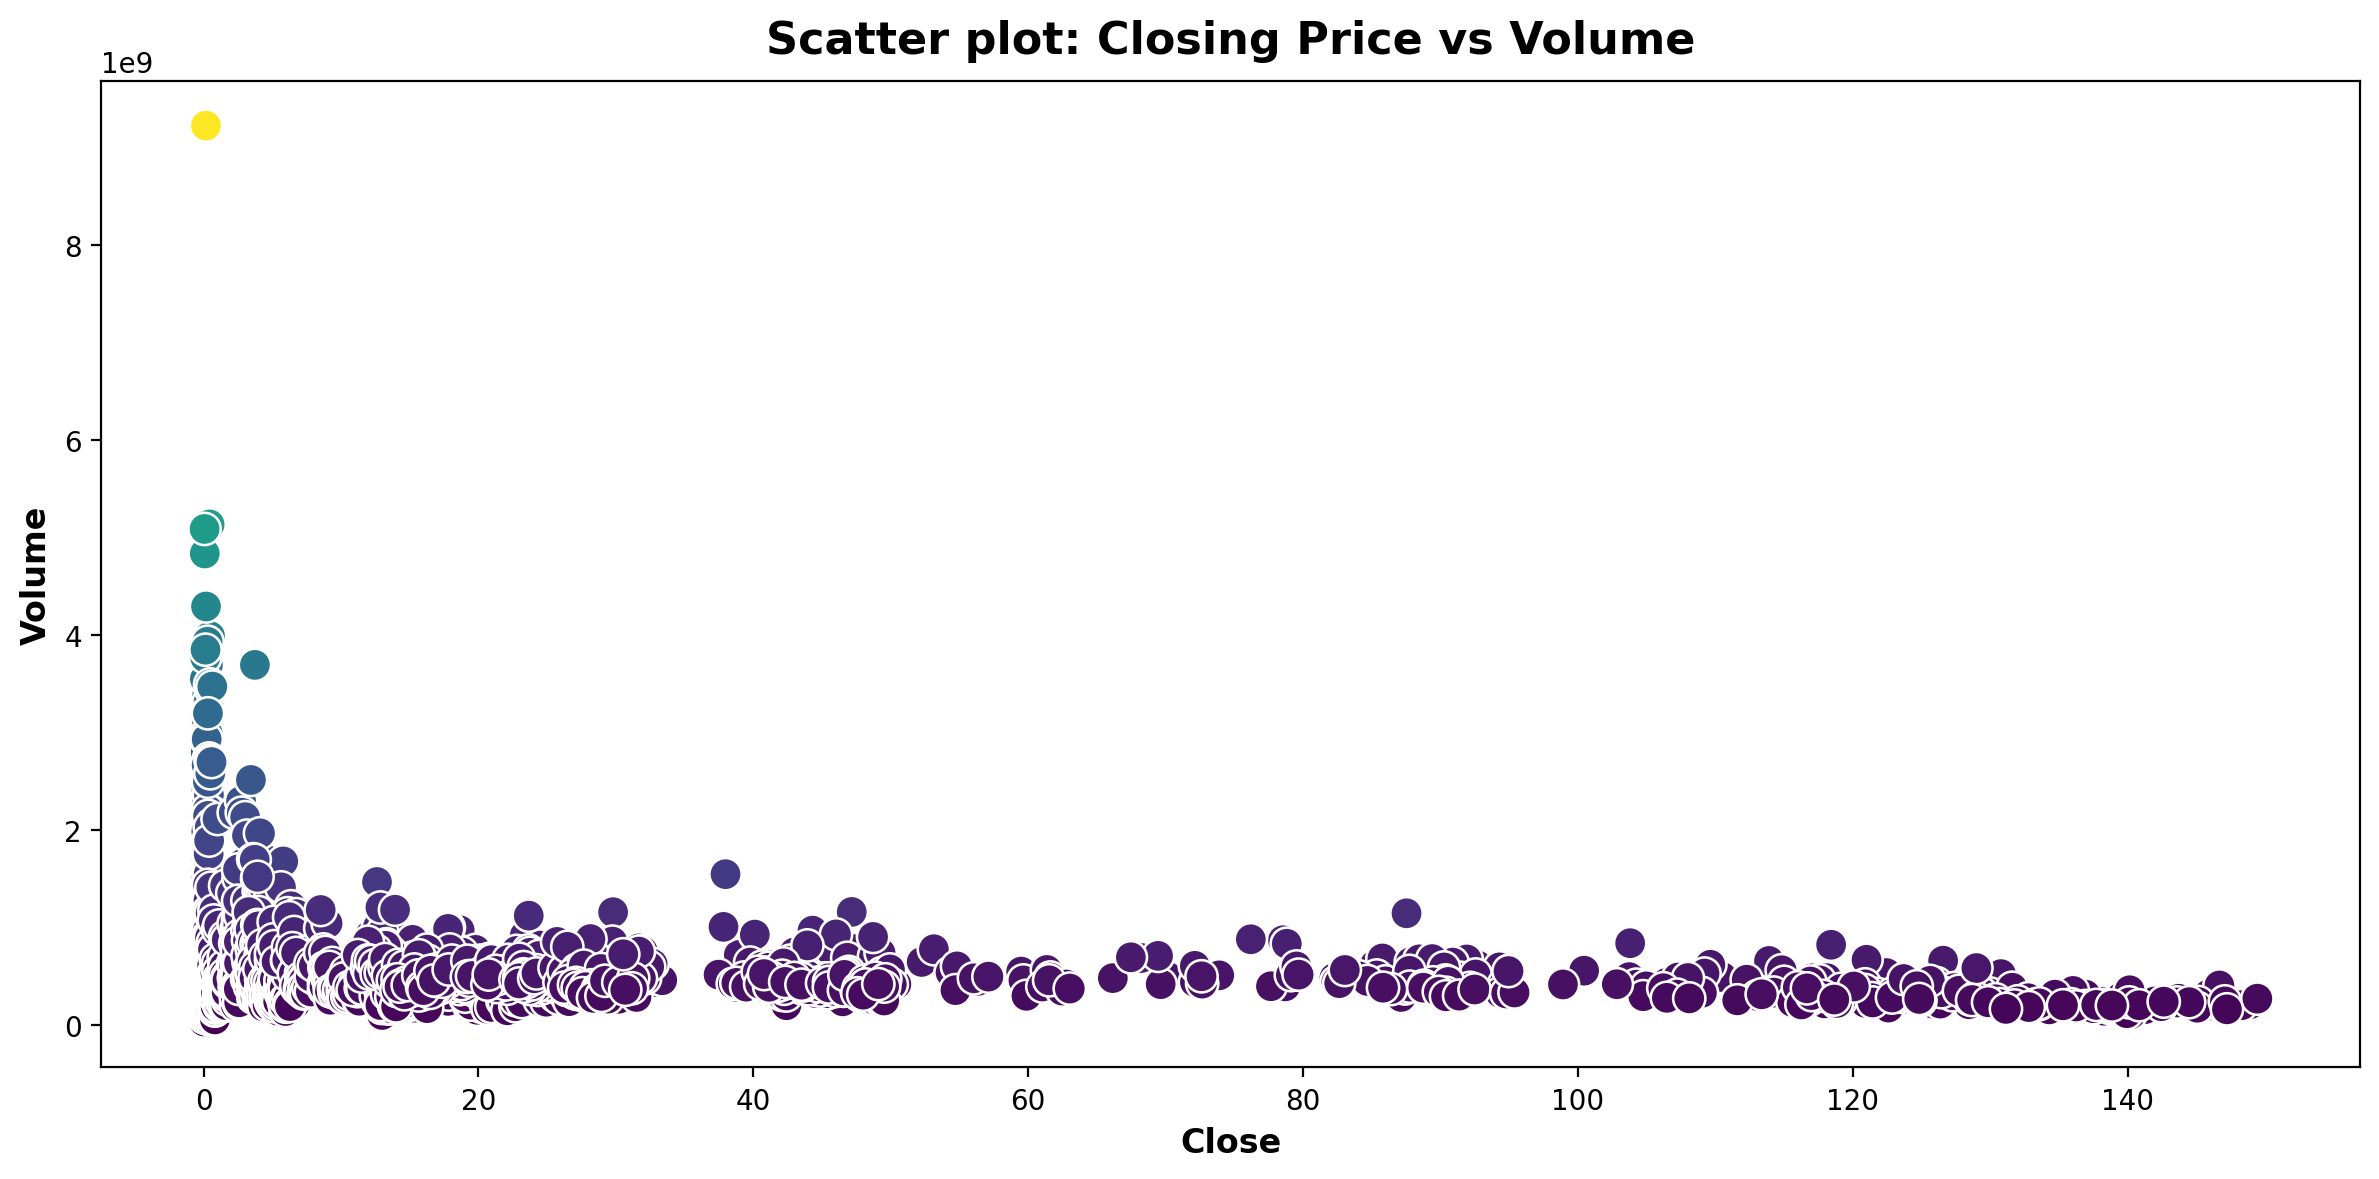

In [9]:
sns.scatterplot(x='Close', y='Volume', data=df, hue='Volume', palette='viridis', legend=False,
               s=135)
plt.title('Scatter plot: Closing Price vs Volume')

Text(0.5, 1.0, 'Scatter plot: Closing Price vs Volume')

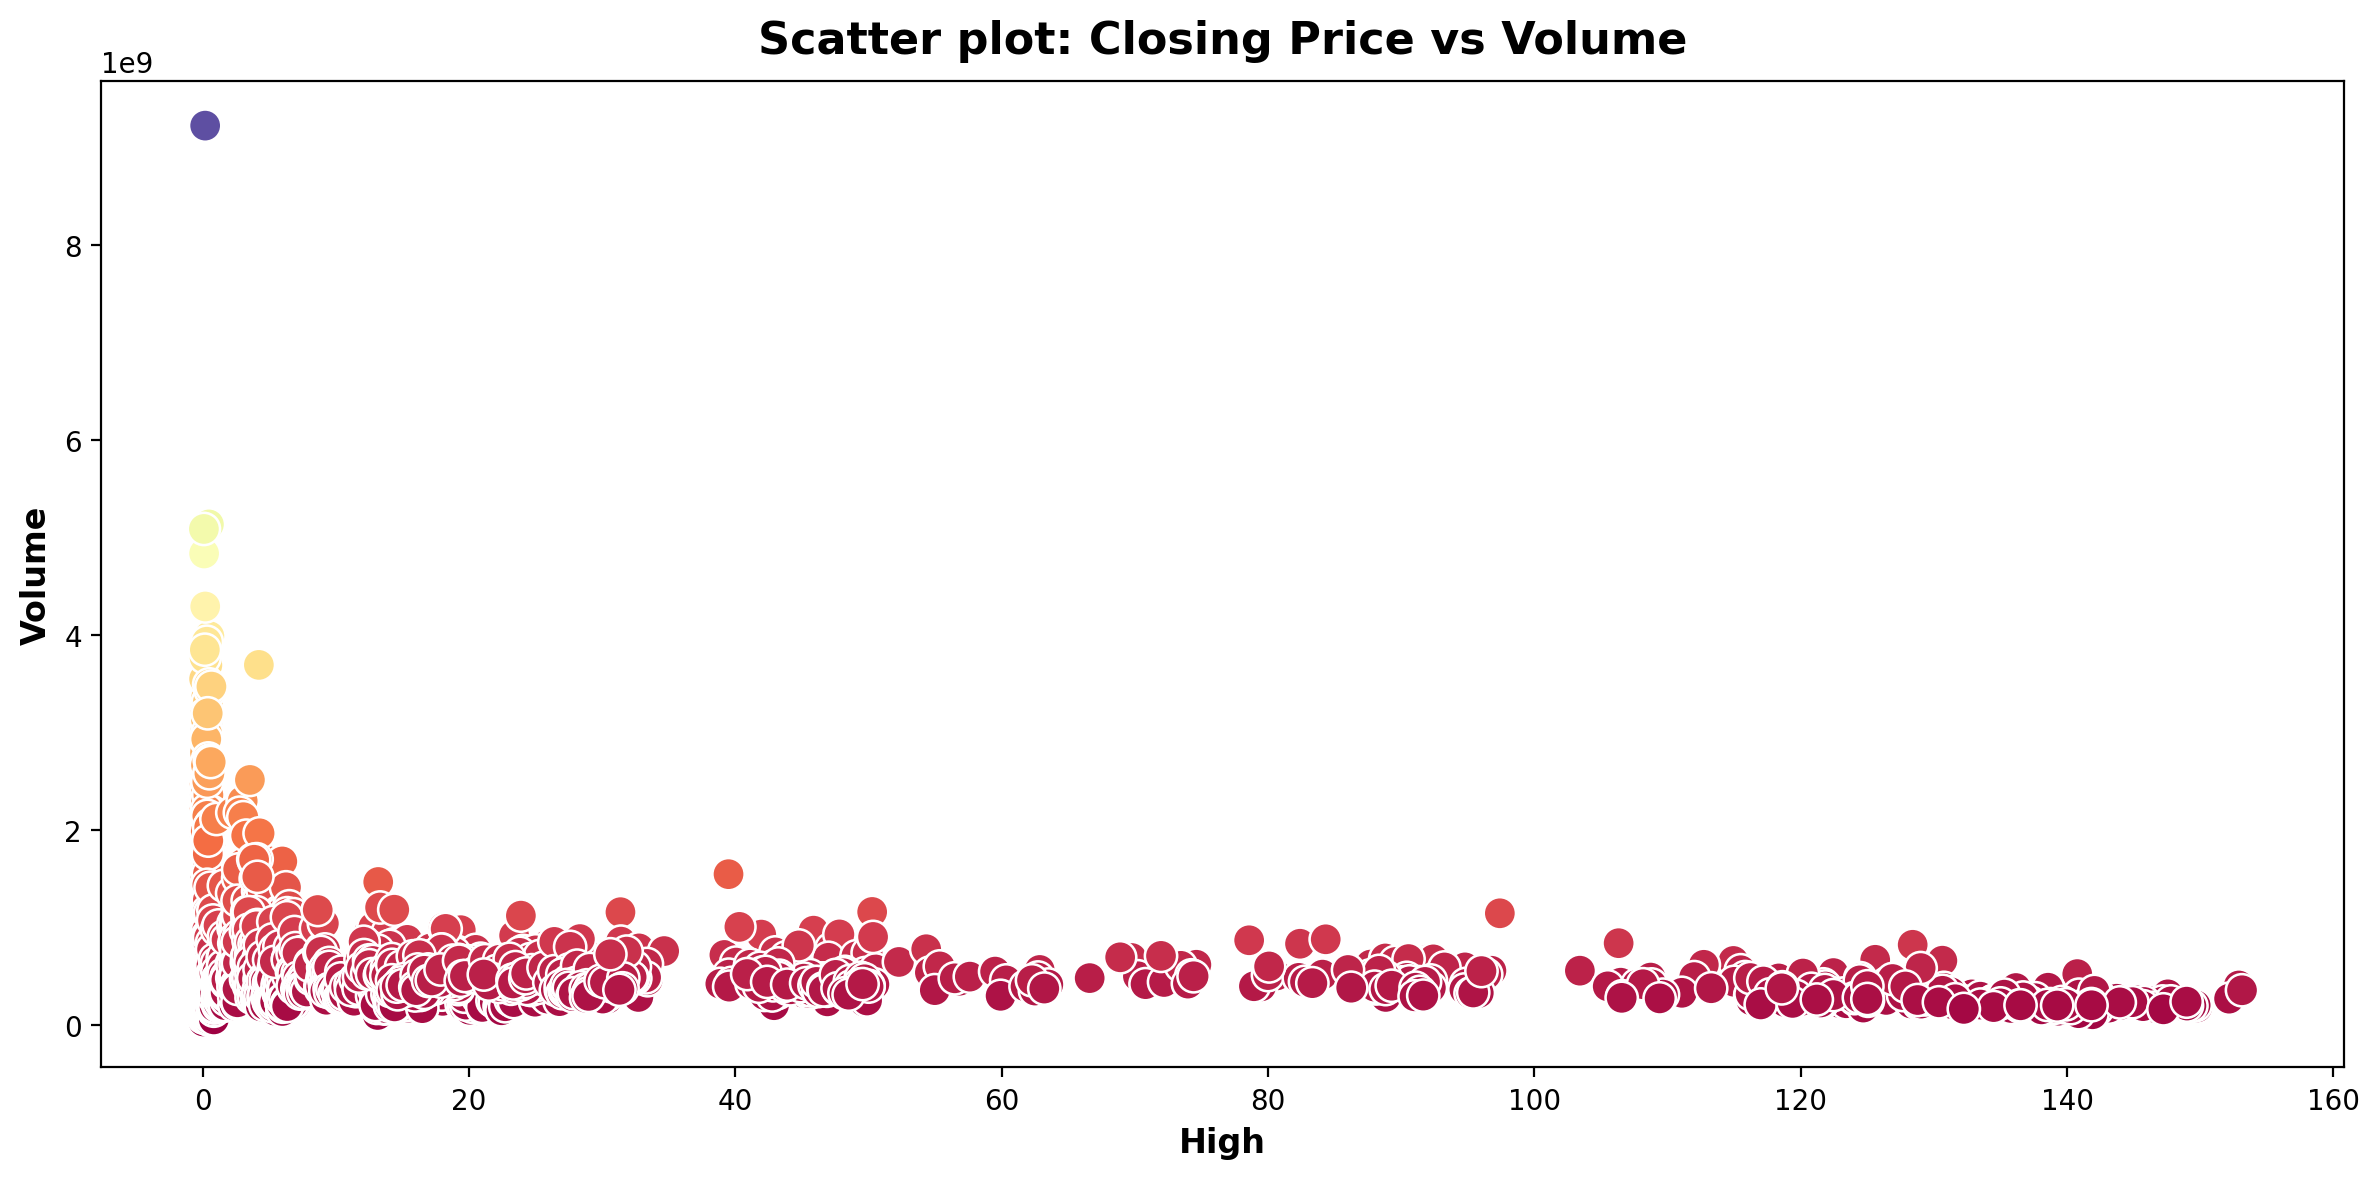

In [10]:
sns.scatterplot(x='High', y='Volume', data=df, hue='Volume', palette='Spectral', legend=False,
               s=135)
plt.title('Scatter plot: Closing Price vs Volume')

## Lineplot

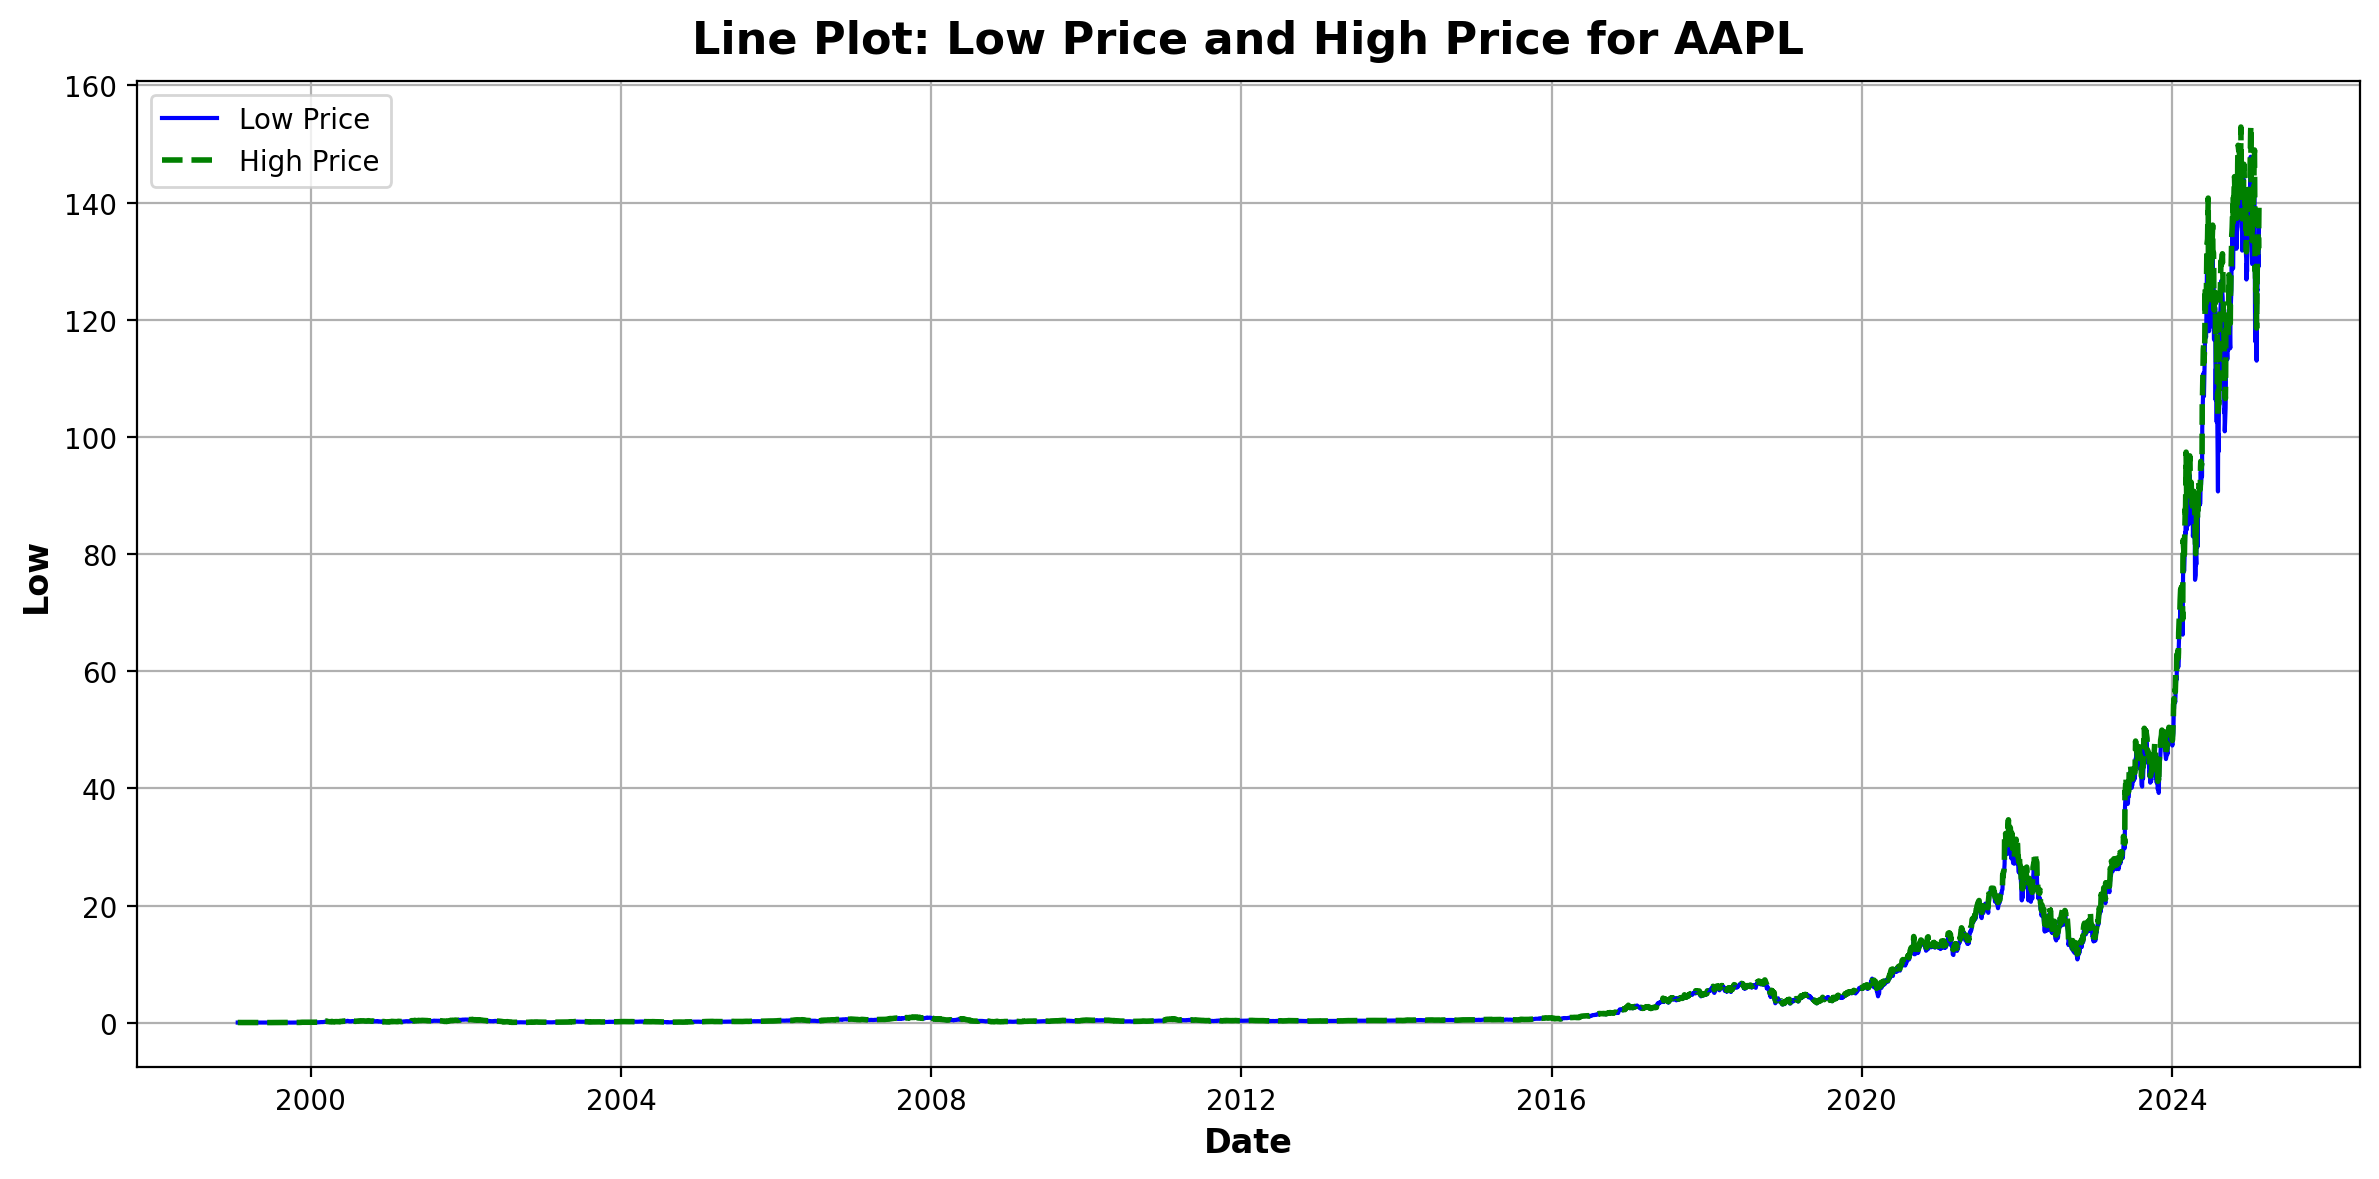

In [11]:
fig, axs = plt.subplots()
axs = sns.lineplot(ax=axs, x=df.index, y=df['Low'], label='Low Price', color='blue', linewidth=1.5)
_ = sns.lineplot(ax=axs, x=df.index, y=df['High'], label='High Price', color='green', linestyle='--', linewidth=2)
plt.title('Line Plot: Low Price and High Price for AAPL')
plt.grid()

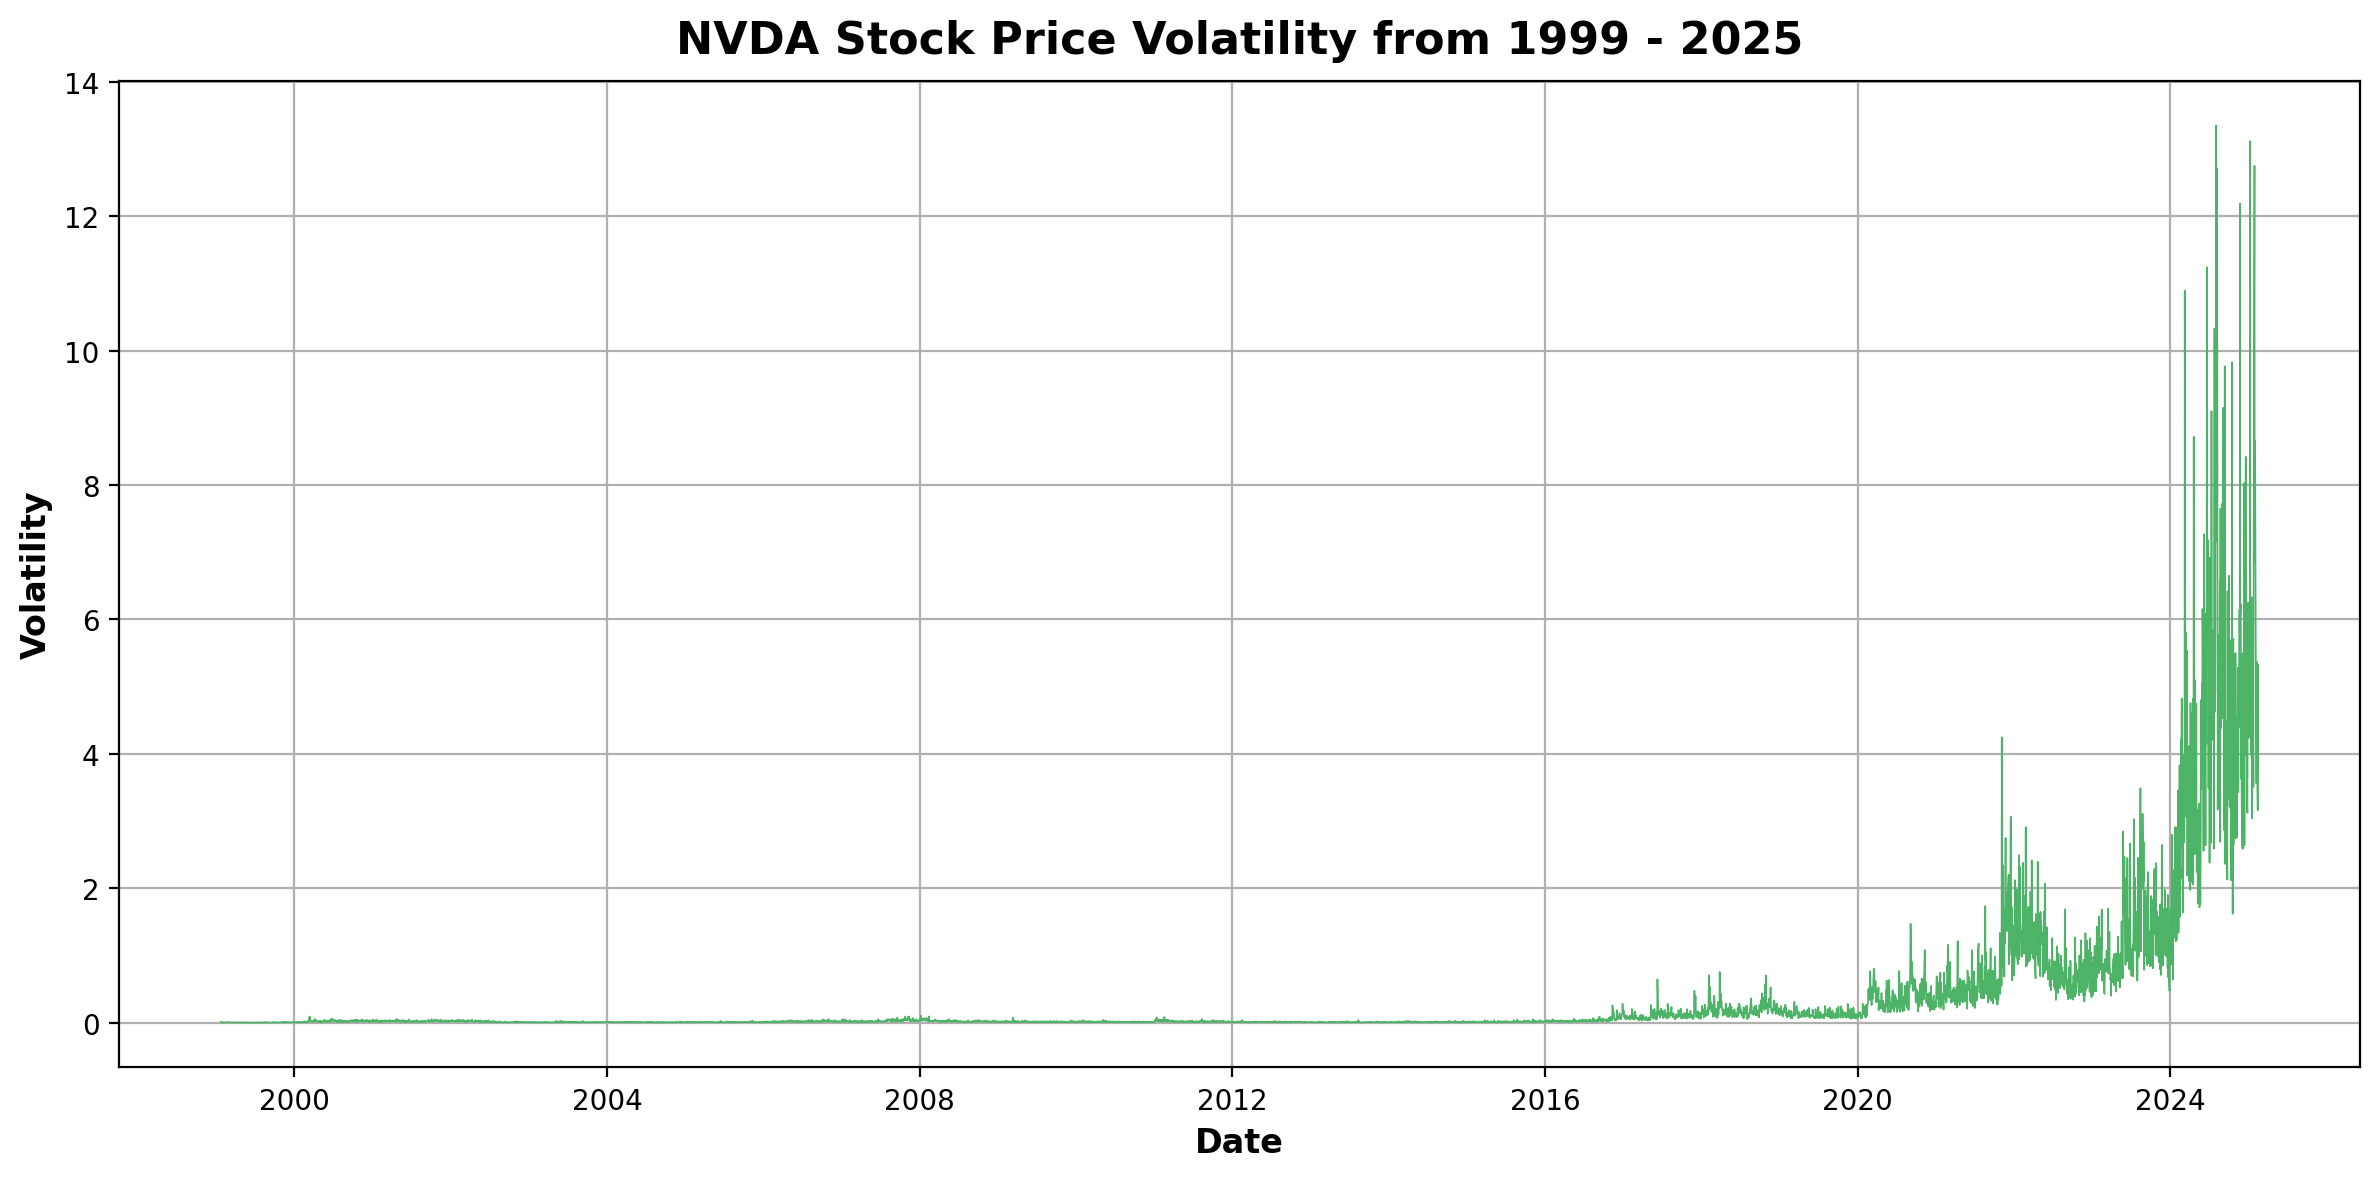

In [12]:
df['Volatility'] = df['High'] - df['Low']
sns.lineplot(x=df.index, y='Volatility', data=df, color=(0.3, 0.7, 0.4), linewidth=0.6)
plt.title('NVDA Stock Price Volatility from 1999 - 2025')
plt.grid()


## Moving averages of Close Price

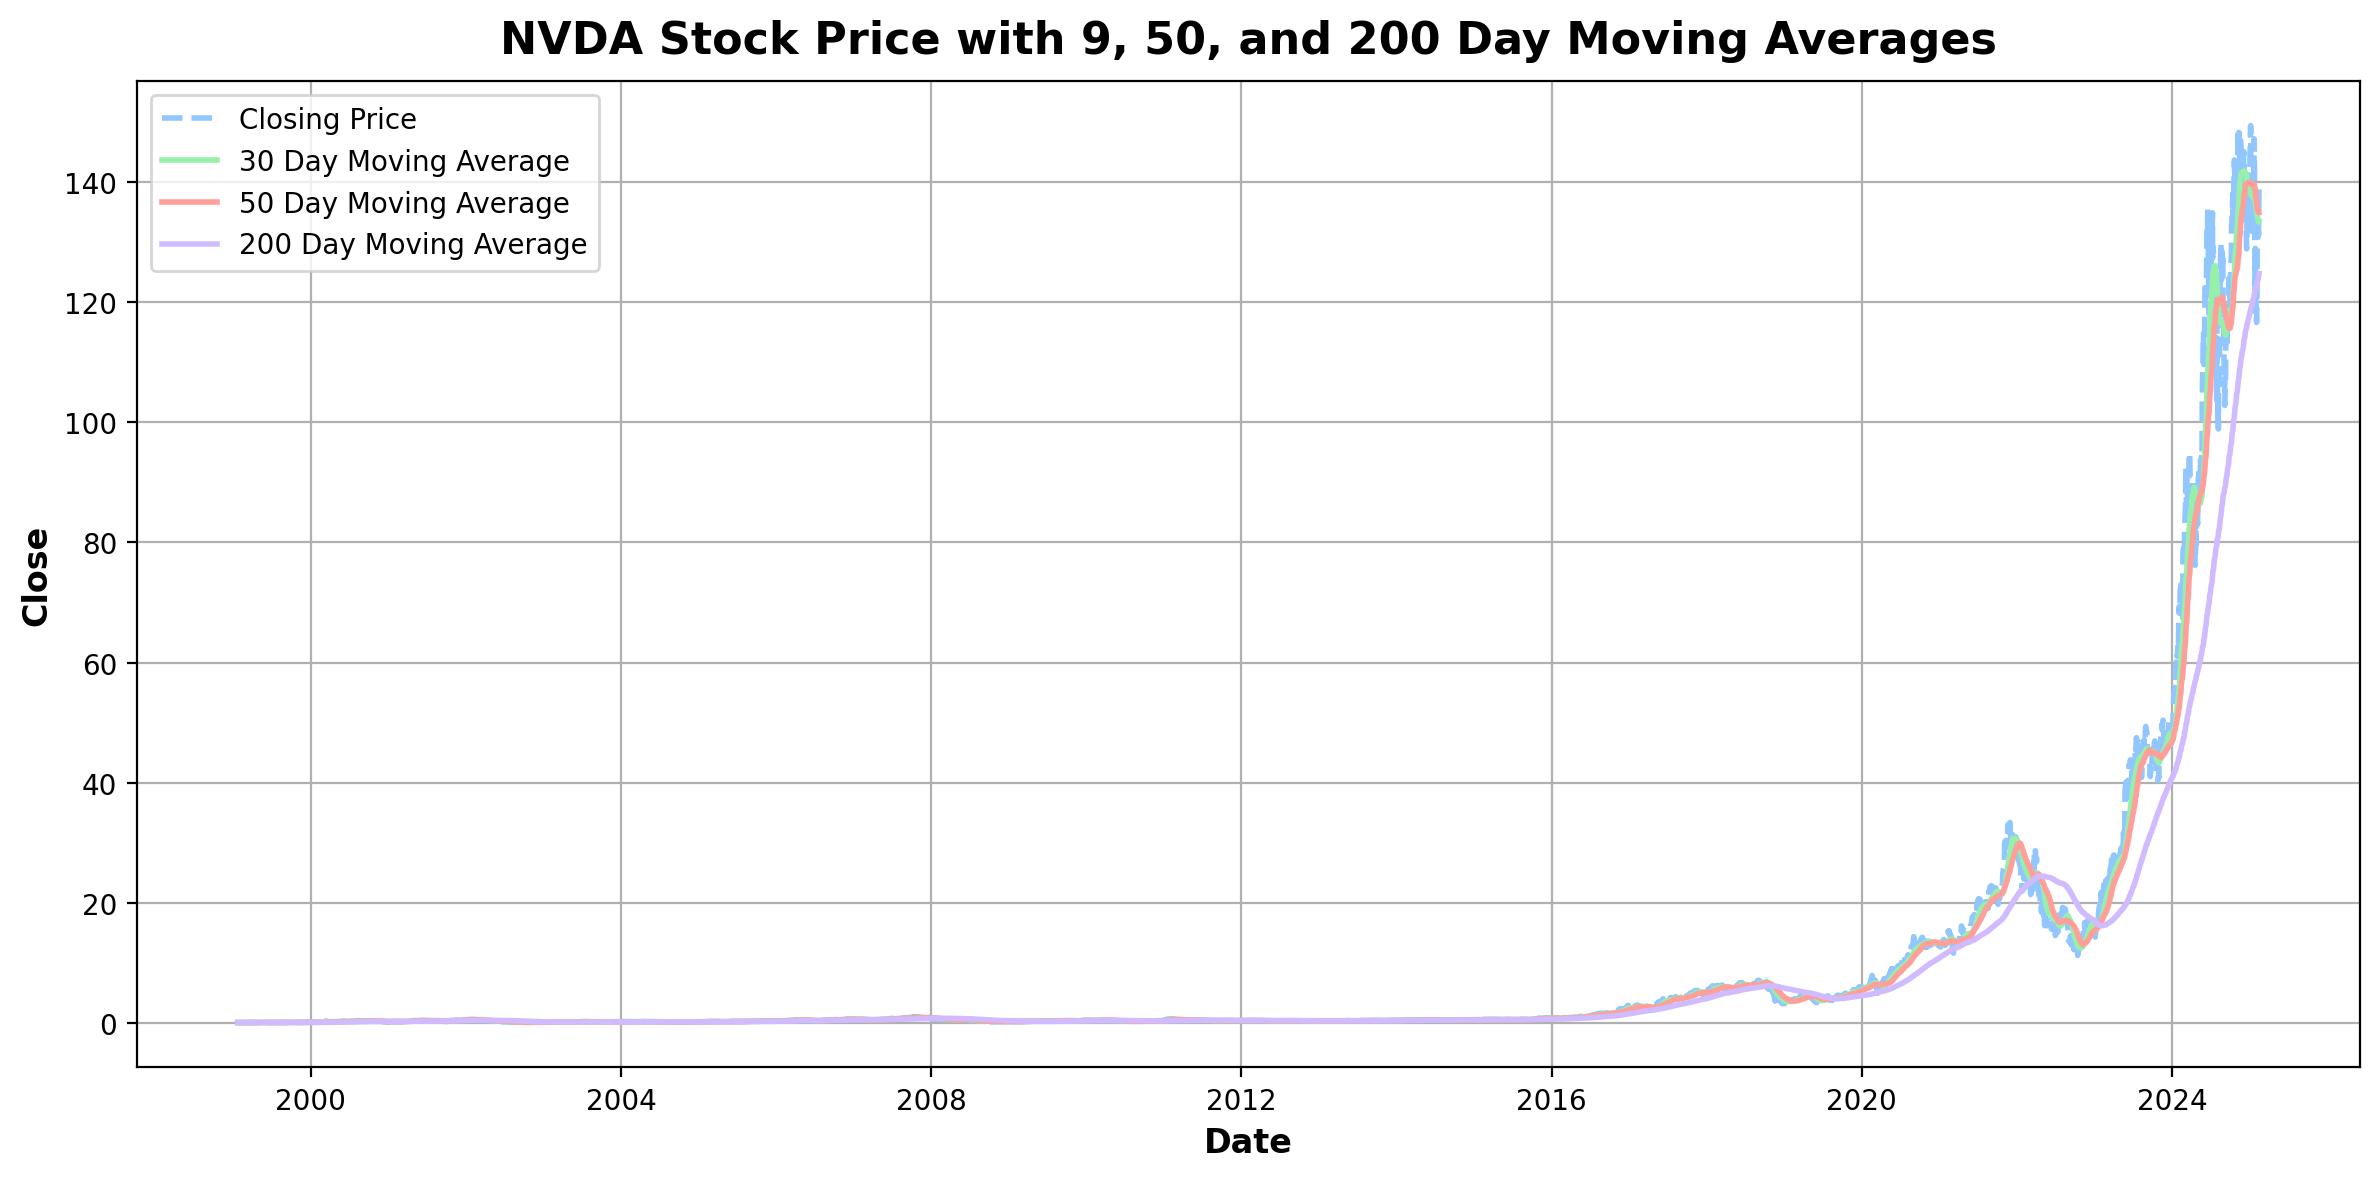

In [13]:
df['MA30'] = df['Close'].rolling(window=30, min_periods=1).mean().fillna(0.0)
df['MA50'] = df['Close'].rolling(window=50, min_periods=1).mean().fillna(0.0)
df['MA200'] = df['Close'].rolling(window=200, min_periods=1).mean().fillna(0.0)
fig, axs = plt.subplots()
axs = sns.lineplot(x=df.index, y=df['Close'], label='Closing Price', linewidth=2, linestyle='--')
axs = sns.lineplot(x=df.index, y=df['MA30'], label='30 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA50'], label='50 Day Moving Average', linewidth=2)
axs = sns.lineplot(x=df.index, y=df['MA200'], label='200 Day Moving Average', linewidth=2)
plt.title('NVDA Stock Price with 9, 50, and 200 Day Moving Averages')
plt.grid()

## Moving averages of Volume

## Relative Strength

In [14]:
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
av_gain = gain.rolling(window=14).mean()
av_loss = loss.rolling(window=14).mean()
rs = av_gain / av_loss
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'] = df['RSI'].fillna(0.0)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


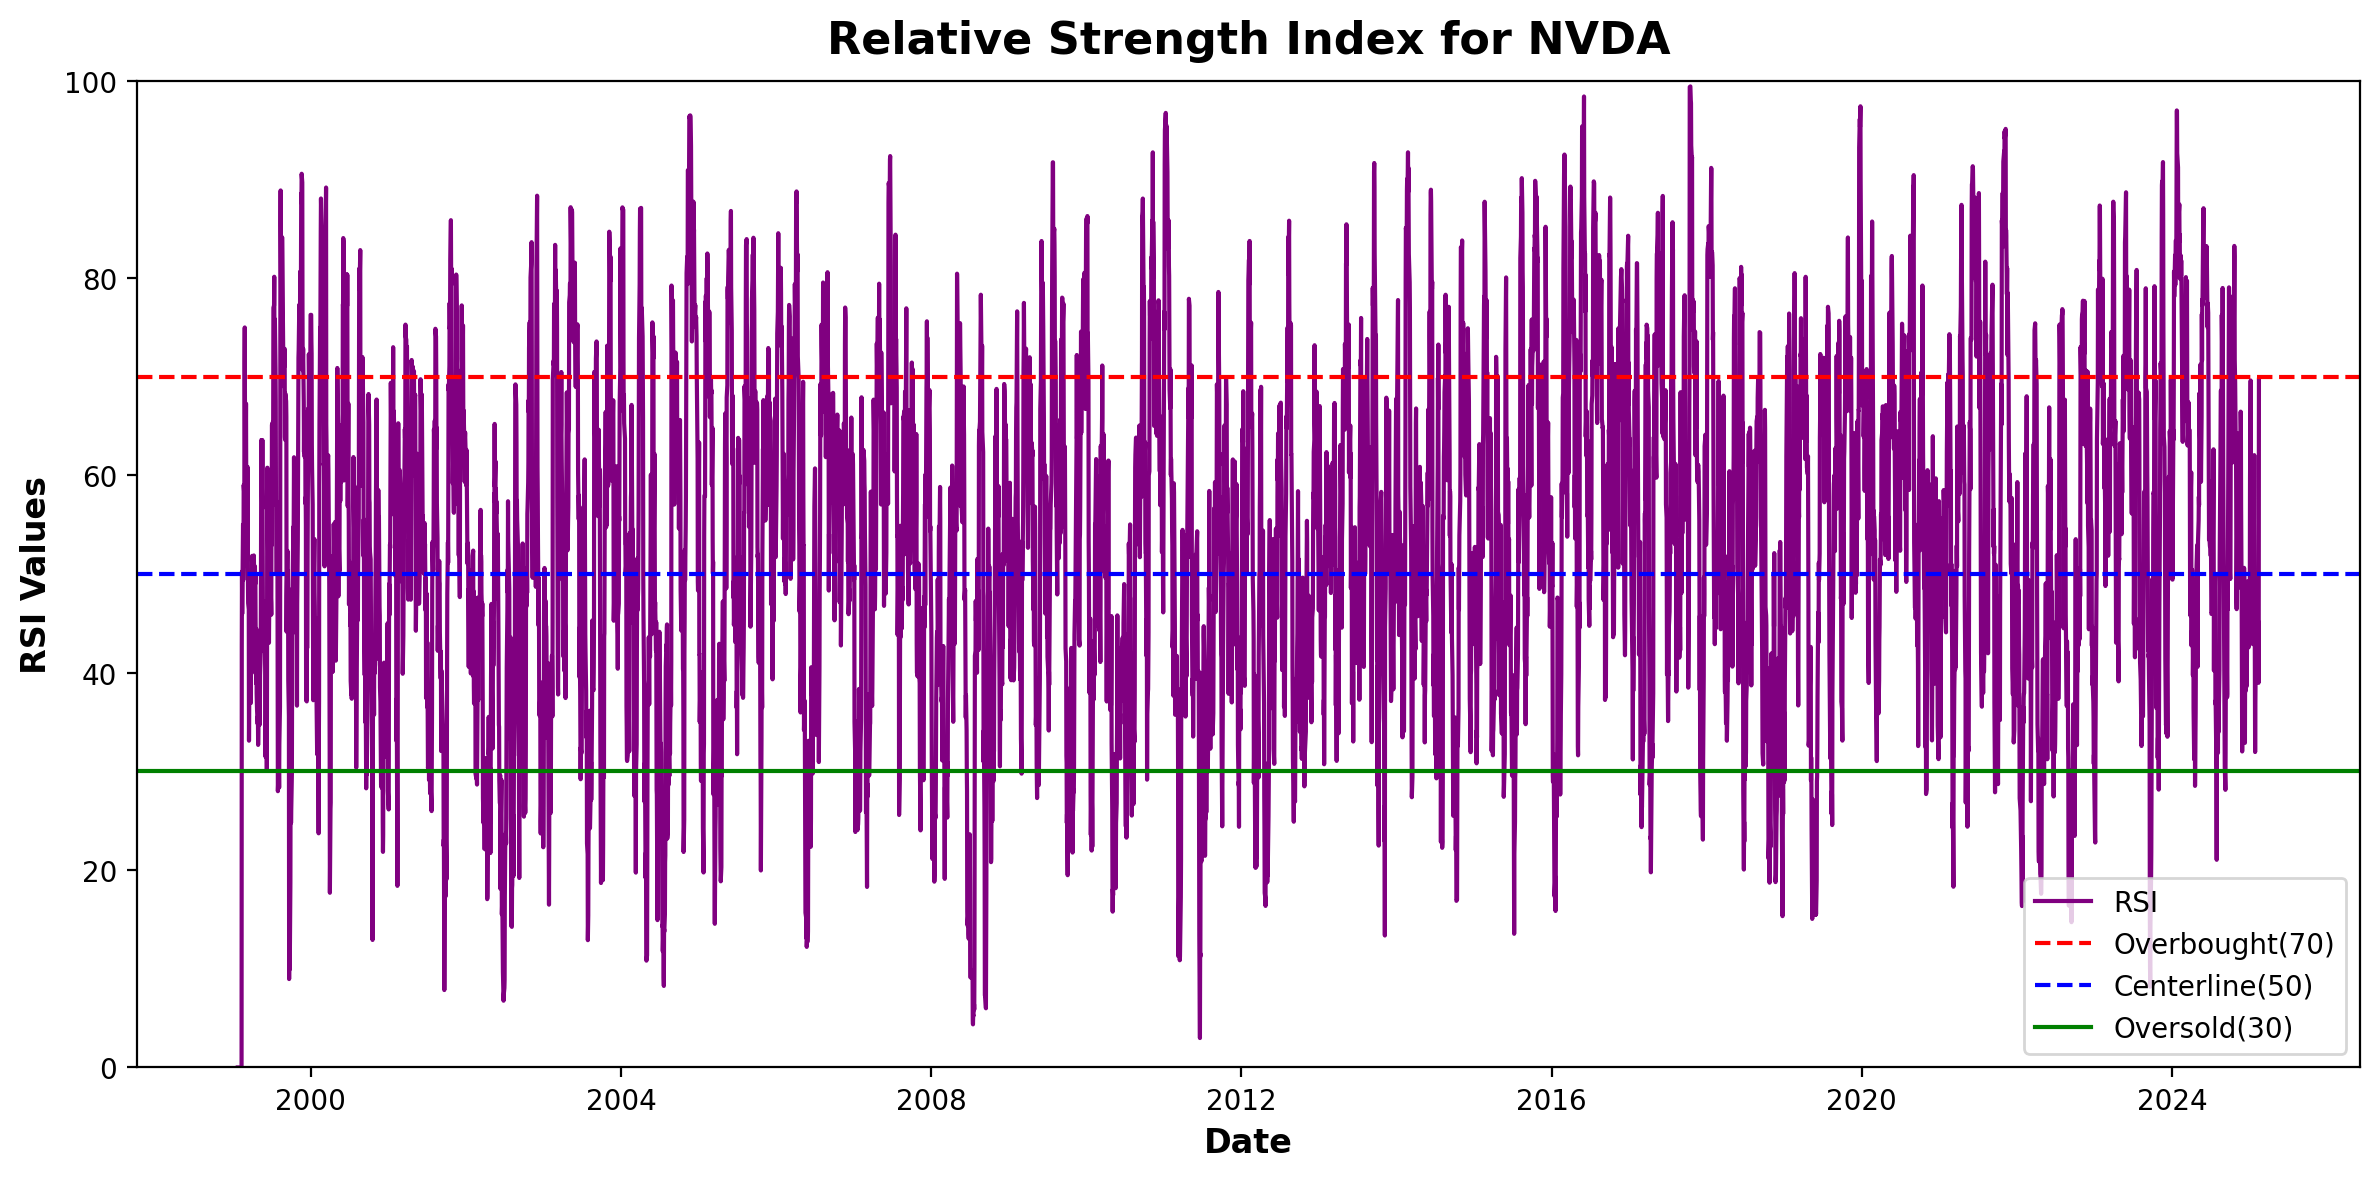

In [15]:
fig, ax2 = plt.subplots()
ax2.plot(df.index, df['RSI'], label='RSI', color='Purple')
ax2.set_ylabel('RSI Values')
ax2.set_xlabel('Date')
ax2.set_title('Relative Strength Index for NVDA')
ax2.set_ylim(0, 100)
ax2.axhline(70, color='red', linestyle='--', label='Overbought(70)')
ax2.axhline(50, color='blue', linestyle='--', label='Centerline(50)')
ax2.axhline(30, color='green', linestyle='-', label='Oversold(30)')
plt.legend()

RSI helps identify overbought (above 70) or oversold (below 30) conditions

# Feature engineering

In [16]:
for lag in [1, 3, 5, 10]:
    df[f'Close_Lag_{lag}'] = df['Close'].shift(lag).fillna(0.0)

In [17]:
target = df.Close.shift(-1).fillna(0.0) # predict next day close price

** Picking next day close price as a target to avoid target leakage

## Correlation matrix

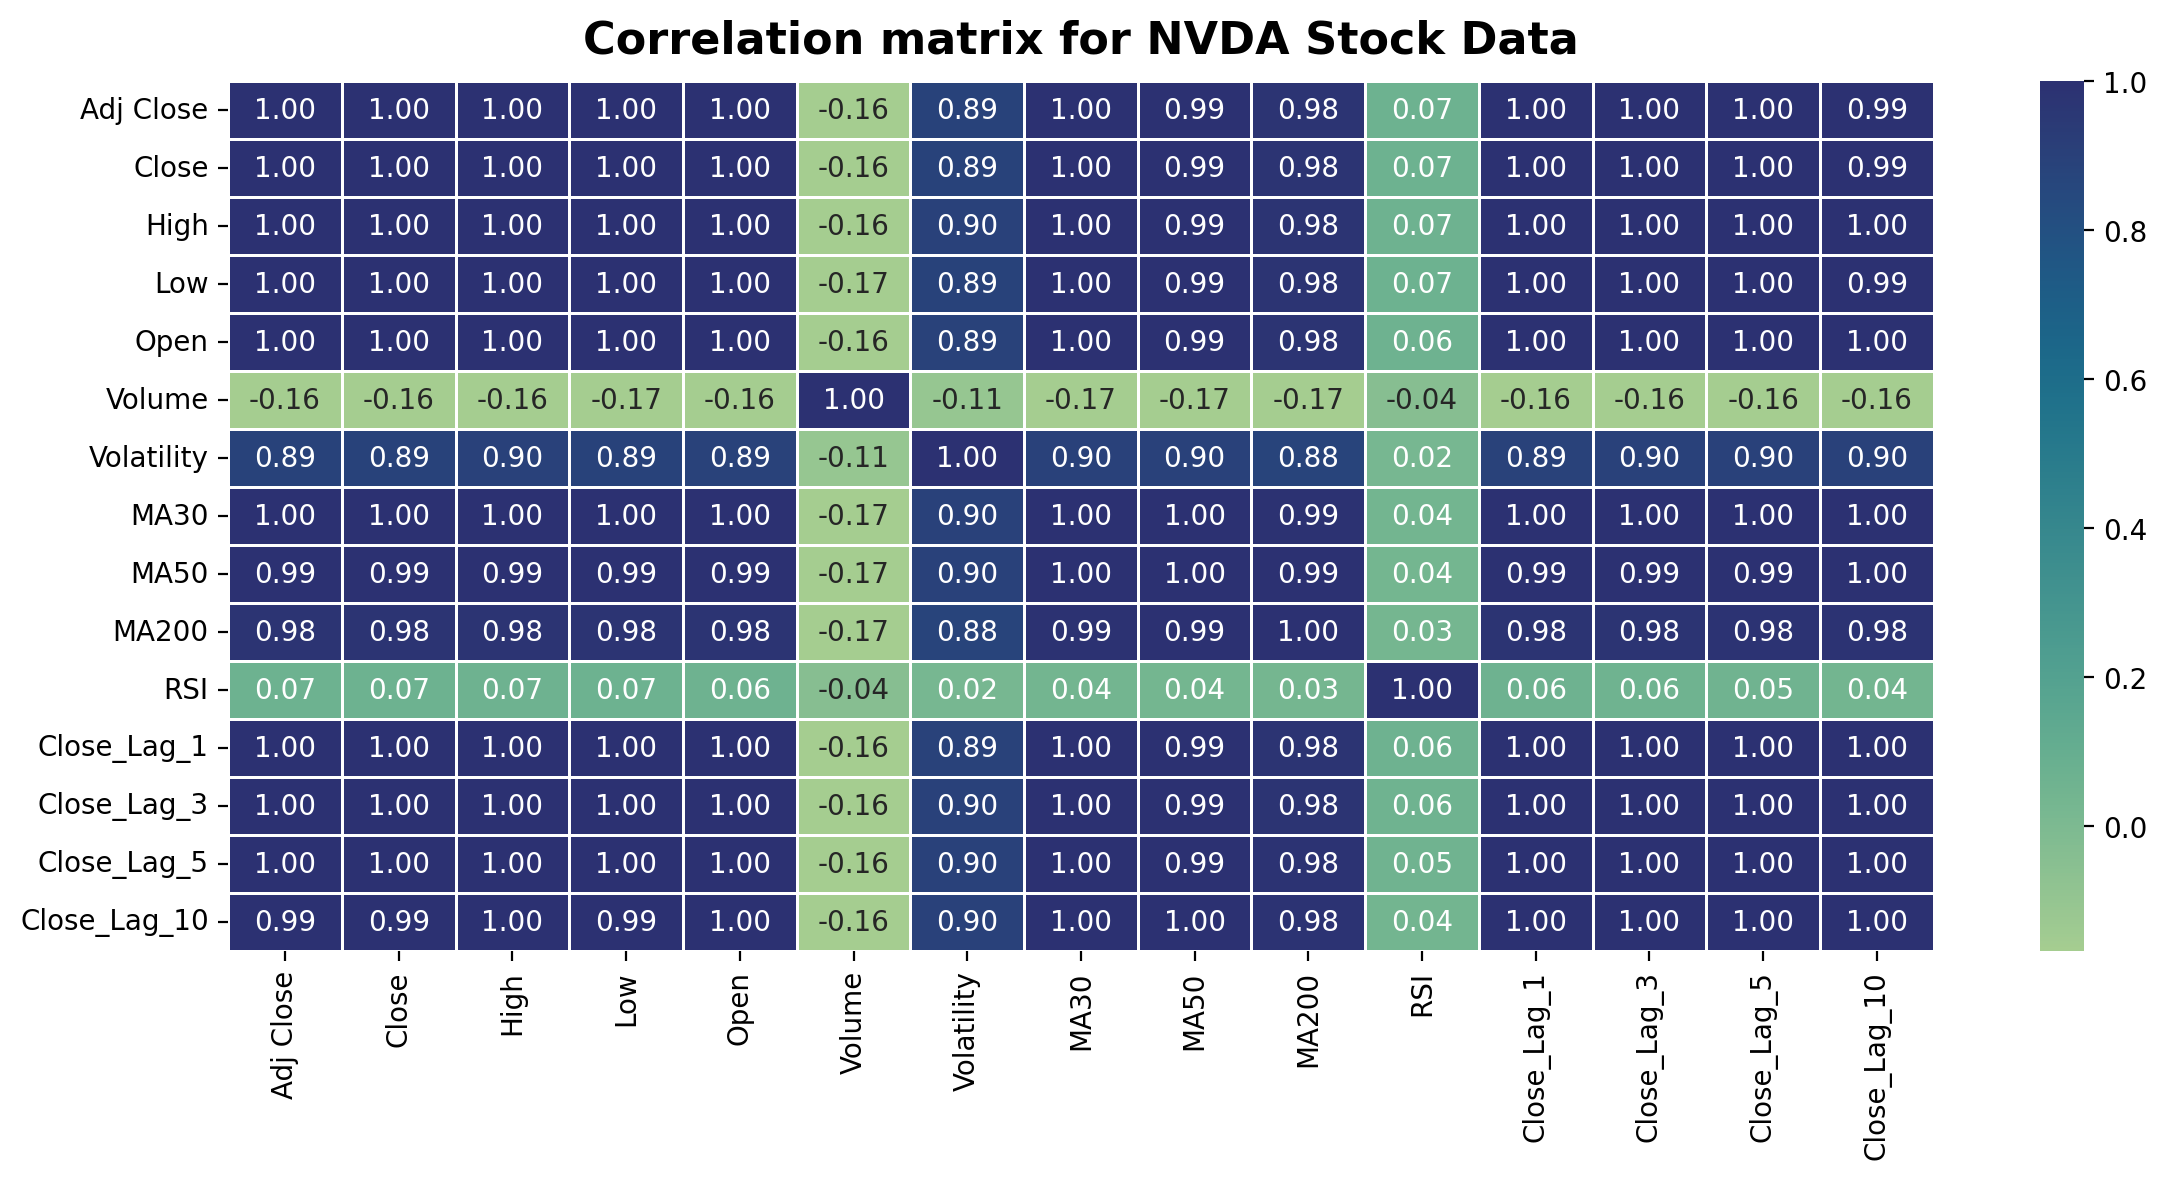

In [18]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='crest')
plt.title('Correlation matrix for NVDA Stock Data')
plt.show()

# Building a predictive model

## Splitting the data into train and valid

In [19]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Volatility',
       'MA30', 'MA50', 'MA200', 'RSI', 'Close_Lag_1', 'Close_Lag_3',
       'Close_Lag_5', 'Close_Lag_10'],
      dtype='object')

In [20]:
# Keeping only strongly correlated features
selected_features = ['High', 'Low', 'Open', 'Volume', 'Volatility',
       'MA30', 'MA50', 'MA200', 'Close_Lag_1', 'Close_Lag_3',
       'Close_Lag_5', 'Close_Lag_10']

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[selected_features]
y = target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=30, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## Multi-model predictions

In [22]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

In [23]:
models = {
    'Linear': LinearRegression(),
    'ElasticNet': ElasticNet(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=30),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=150, random_state=30),
    'AdaBoost': AdaBoostRegressor(loss='exponential', n_estimators=100, random_state=30),
    'Support Vector Machine': SVR(kernel='rbf', C=8, gamma=0.001),
}

In [24]:
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    # Make predictions on the test data
    y_pred = model.predict(X_valid)
    
    results[name] = {
        'Mean Absolute Error': mean_absolute_error(y_valid, y_pred),
        'Mean Squared Error': mean_squared_error(y_valid, y_pred),
        'R2 Score': r2_score(y_valid, y_pred),
        'Training Time(s)': training_time
    }

results_df = pd.DataFrame(results).T
results_df

,Mean Absolute Error,Mean Squared Error,R2 Score,Training Time(s)
Linear,0.792898,12.414823,0.990870,0.023196
ElasticNet,3.487292,42.902830,0.968448,0.024911
Random Forest,25.491843,2009.475511,-0.477820,4.541759
GradientBoosting,25.660265,2018.173966,-0.484217,2.906946
AdaBoost,25.525119,2010.714591,-0.478731,1.289599
Support Vector Machine,26.470273,2087.860446,-0.535466,0.018093


As we can see from the table above, ensemble models and SVM are not good predictor of stock prices. Since, we are getting r2 score in negative and mean squared error of around 2000.